In [1]:
#interact_manual

import ipywidgets
import folium
print(folium.__file__)
print(folium.__version__)
import folium.plugins
import numpy

/home/anacos/anaconda3/lib/python3.6/site-packages/folium/__init__.py
0.5.0


In [174]:
#http://api.wunderground.com/api/Your_Key/history_YYYYMMDD/q/CA/San_Francisco.json
    
import urllib
import json
f = urllib.request.urlopen('http://api.wunderground.com/api/1f725d0a99f78a63/history_20171220/q/NO/Oslo.json')
json_string = f.read()
parsed_json = json.loads(json_string)
#location = parsed_json['NO']['Oslo']
#temp_f = parsed_json['current_observation']['temp_f']
#print( "Current temperature in %s is: %s" % (location, temp_f))
print(parsed_json)
f.close()

{'response': {'version': '0.1', 'termsofService': 'http://www.wunderground.com/weather/api/d/terms.html', 'features': {'history': 1}}, 'history': {'date': {'pretty': 'December 20, 2017', 'year': '2017', 'mon': '12', 'mday': '20', 'hour': '00', 'min': '00', 'tzname': 'Europe/Oslo'}, 'utcdate': {'pretty': 'December 19, 2017', 'year': '2017', 'mon': '12', 'mday': '19', 'hour': '23', 'min': '00', 'tzname': 'UTC'}, 'observations': [{'date': {'pretty': '12:00 AM CET on December 20, 2017', 'year': '2017', 'mon': '12', 'mday': '20', 'hour': '00', 'min': '00', 'tzname': 'Europe/Oslo'}, 'utcdate': {'pretty': '11:00 PM GMT on December 19, 2017', 'year': '2017', 'mon': '12', 'mday': '19', 'hour': '23', 'min': '00', 'tzname': 'UTC'}, 'tempm': '-5', 'tempi': '23', 'dewptm': '-5', 'dewpti': '22', 'hum': '97', 'wspdm': '0.0', 'wspdi': '0.0', 'wgustm': '', 'wgusti': '', 'wdird': '', 'wdire': '', 'vism': '0.1', 'visi': '0', 'pressurem': '', 'pressurei': '', 'windchillm': '-999', 'windchilli': '-999', 'h

In [195]:
type(parsed_json)
#print(parsed_json['response']['features']['history'])
print(parsed_json['history']['observations'])
type(parsed_json['history']['observations']) #list
parsed_json['history']['observations'][-1]

[{'date': {'pretty': '12:00 AM CET on December 20, 2017', 'year': '2017', 'mon': '12', 'mday': '20', 'hour': '00', 'min': '00', 'tzname': 'Europe/Oslo'}, 'utcdate': {'pretty': '11:00 PM GMT on December 19, 2017', 'year': '2017', 'mon': '12', 'mday': '19', 'hour': '23', 'min': '00', 'tzname': 'UTC'}, 'tempm': '-5', 'tempi': '23', 'dewptm': '-5', 'dewpti': '22', 'hum': '97', 'wspdm': '0.0', 'wspdi': '0.0', 'wgustm': '', 'wgusti': '', 'wdird': '', 'wdire': '', 'vism': '0.1', 'visi': '0', 'pressurem': '', 'pressurei': '', 'windchillm': '-999', 'windchilli': '-999', 'heatindexm': '-9999', 'heatindexi': '-9999', 'precipm': '', 'precipi': '', 'conds': '', 'icon': '', 'fog': '0', 'rain': '0', 'snow': '0', 'hail': '0', 'thunder': '0', 'tornado': '0', 'metar': 'AAXX 19231 01384 46/01 /0000 11049 21053 58005'}, {'date': {'pretty': '12:20 AM CET on December 20, 2017', 'year': '2017', 'mon': '12', 'mday': '20', 'hour': '00', 'min': '20', 'tzname': 'Europe/Oslo'}, 'utcdate': {'pretty': '11:20 PM GMT

{'conds': 'Light Freezing Fog',
 'date': {'hour': '23',
  'mday': '20',
  'min': '50',
  'mon': '12',
  'pretty': '11:50 PM CET on December 20, 2017',
  'tzname': 'Europe/Oslo',
  'year': '2017'},
 'dewpti': '24.8',
 'dewptm': '-4.0',
 'fog': '1',
 'hail': '0',
 'heatindexi': '-9999',
 'heatindexm': '-9999',
 'hum': '100',
 'icon': 'fog',
 'metar': 'METAR ENGM 202250Z 00000KT 0450 R19R/0650U R01R/0450N FZFG VV001 M04/M04 Q1021',
 'precipi': '-9999.00',
 'precipm': '-9999.00',
 'pressurei': '30.15',
 'pressurem': '1021',
 'rain': '0',
 'snow': '0',
 'tempi': '24.8',
 'tempm': '-4.0',
 'thunder': '0',
 'tornado': '0',
 'utcdate': {'hour': '22',
  'mday': '20',
  'min': '50',
  'mon': '12',
  'pretty': '10:50 PM GMT on December 20, 2017',
  'tzname': 'UTC',
  'year': '2017'},
 'visi': '0.3',
 'vism': '0.4',
 'wdird': '0',
 'wdire': 'North',
 'wgusti': '-9999.0',
 'wgustm': '-9999.0',
 'windchilli': '-999',
 'windchillm': '-999',
 'wspdi': '0.0',
 'wspdm': '0.0'}

In [2]:
import patatmo
import json
# your patatmo connect developer credentials
credentials = json.load(open("netatmo.credentials"))

# create an api client
client = patatmo.api.client.NetatmoClient()
# tell the client's authentication your credentials
client.authentication.credentials = credentials
# optionally give the authentication a temporary file.
# The tokens are then stored there for later reuse,
# e.g. next time you invoke this script.
# This saves time because no new tokens have to be requested.
# New tokens are then only requested if the old ones expire.
client.authentication.tmpfile = "temp_auth.json"

dimensao da data2 606
dimensao de lats 606
temperature:  2.26215502603 1.28201320132
pressure:  15.4921547781 1009.26435644
humidity:  9.68415482368 91.5379537954
altitude:  94.4246045897 157.524293661
1.1371195168777748 0.967586206897


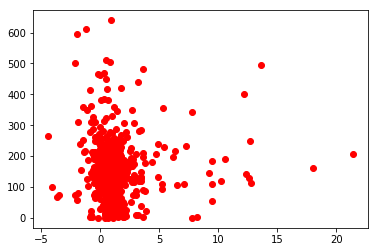

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09875
Date:                Fri, 26 Jan 2018   Prob (F-statistic):              0.753
Time:                        14:02:25   Log-Likelihood:                -1354.0
No. Observations:                 606   AIC:                             2712.
Df Residuals:                     604   BIC:                             2721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3303      0.179      7.433      0.0

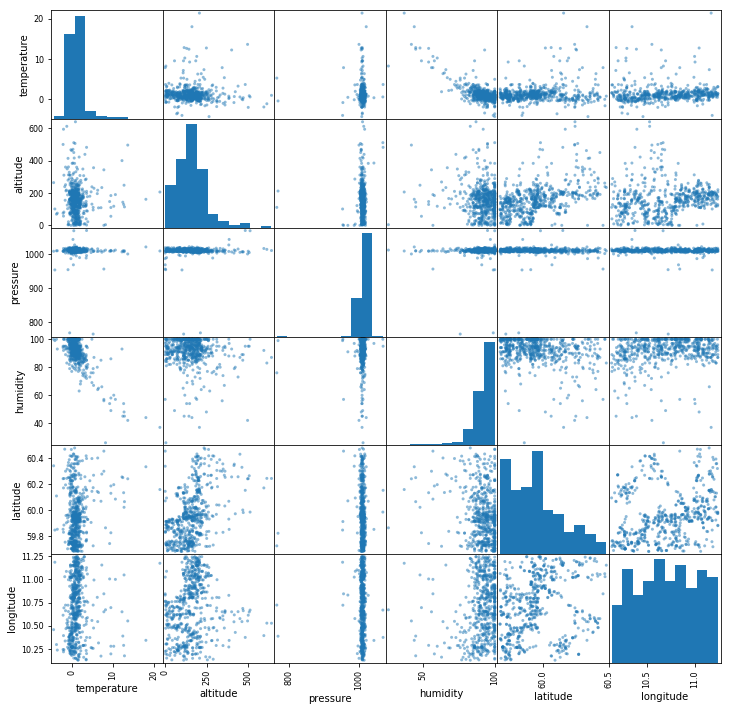

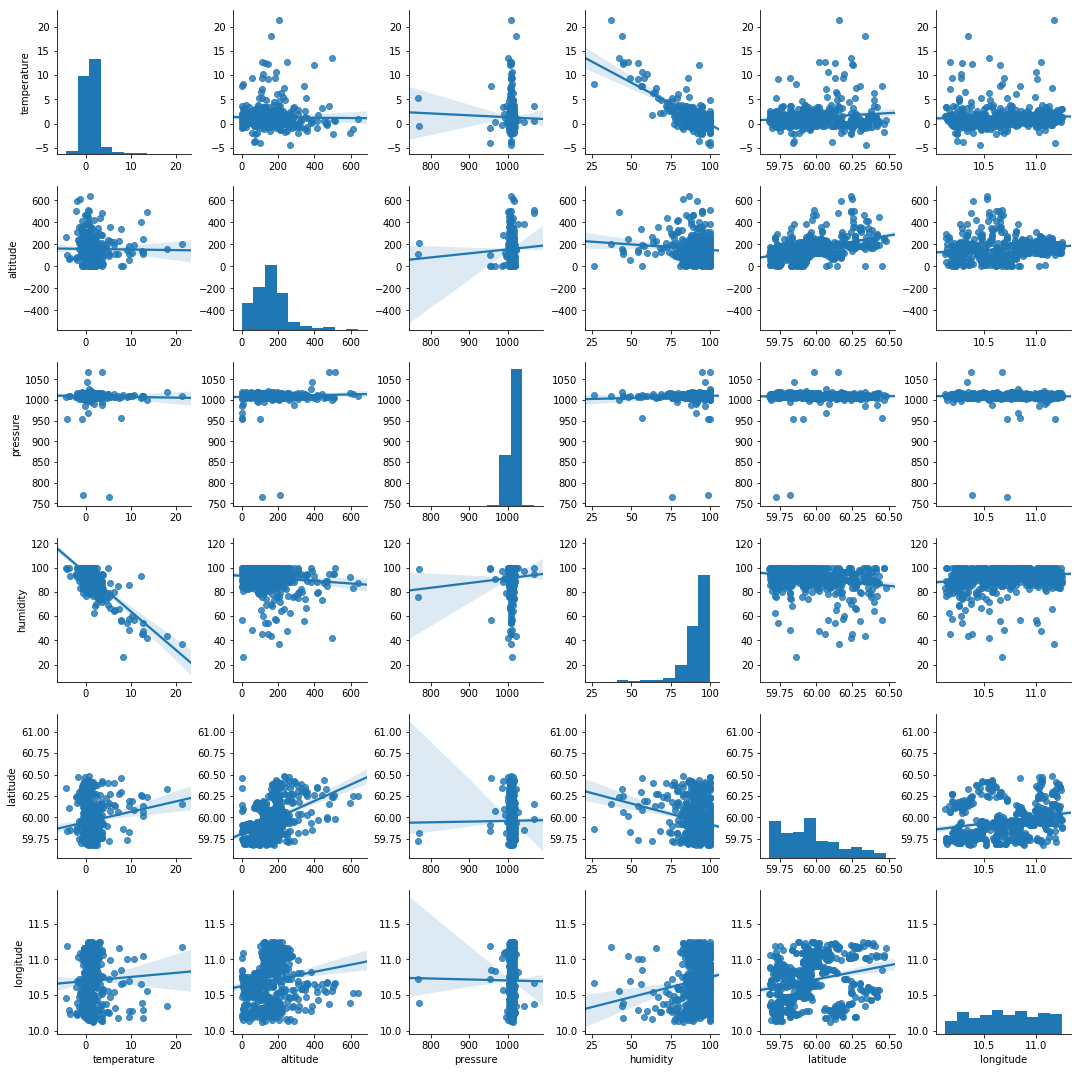

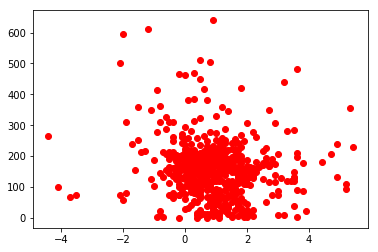

In [28]:
#Removing outliers
# lat/lon outline of Oslo
oslo_region = {
    "lat_ne" : 60.2499,
    "lat_sw" : 59.6809,
    "lon_ne" : 11.0471,
    "lon_sw" : 10.4085,
}

# issue the API request
place = client.Getpublicdata(region = oslo_region)
# convert the response to a pandas.DataFrame
place.dataframe()


data2= place.dataframe().dropna(axis=0)
print("dimensao da data2", len(data2))
    #data2
    #data1= data1[['latitude','longitude','temperature']].as_matrix().tolist()
    #zipado =zip(data2['latitude'].tolist(), data2['longitude'].tolist(),data2['pressure'].tolist())
    #print(list(zipado))
    
#if data2.as_matrix().tolist() == []: 
#        print("No stations in this location.")
        
#else:
lats = data2['latitude'].tolist()
lons = data2['longitude'].tolist()
temper = data2['temperature'].tolist()
press = data2['pressure'].tolist()
humid = data2['humidity'].tolist()
altit =data2["altitude"].tolist()
print("dimensao de lats", len(lats))

#print(temper)
import statistics
import numpy
print("temperature: ",numpy.std(temper,ddof=1), numpy.mean(temper)) #statistics.stdev(temper) same as numpy.std(,ddof=1) for sample

print("pressure: ", numpy.std(press,ddof=1), numpy.mean(press))
print("humidity: ", numpy.std(humid,ddof=1), numpy.mean(humid))
print("altitude: ", numpy.std(altit,ddof=1), numpy.mean(altit))
#print(humid)

mean = numpy.mean(temper)
sd = numpy.std(temper,ddof=1)
final_list = [x for x in temper if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(statistics.stdev(final_list), numpy.mean(final_list))
#print(final_list)
#print(data2)
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np


plt.figure(2)
plt.plot(temper, altit,'ro')
#plt.ylim(-70, 150)
plt.show()

import pandas #same as "pairs" in R

pandas.plotting.scatter_matrix(data2[['temperature', 'altitude', 'pressure', 
                                      'humidity', 'latitude', 'longitude']],figsize=(12,12))

import seaborn

seaborn.pairplot(data=data2,vars=['temperature', 'altitude', 'pressure','humidity', 
                                  'latitude', 'longitude'], kind='reg')  

import statsmodels.formula.api 
model = statsmodels.formula.api.ols("temperature ~ altitude", data2).fit() #linear regression 
print(model.summary())  

modelM= statsmodels.formula.api.ols(formula="temperature ~ altitude + humidity + pressure",
                                    data=data2).fit()
print(modelM.summary())

final_data=[x for x in (data2[['altitude','humidity','latitude','longitude','pressure','temperature']].as_matrix().tolist()) 
             if(x[-1] > mean-2*sd)]
final_data=[x for x in (data2[['altitude','humidity','latitude','longitude','pressure','temperature']].as_matrix().tolist()) 
             if(x[-1] < mean+2*sd)]
temper = [row[-1] for row in final_data]
altit = [row[0] for row in final_data]
humid = [row[1] for row in final_data]
lats = [row[2] for row in final_data]
lons = [row[3] for row in final_data]
press = [row[4] for row in final_data]

# ultima coluna da matrix A: [row[-1] for row in A] 
# ou da matrix a:  a2 = zip(*a)
#a2[-1]

print("temperature new: ", numpy.std(temper,ddof=1), numpy.mean(temper))
print("pressure new: ", numpy.std(press,ddof=1), numpy.mean(press))
print("altitude new: ", numpy.std(altit,ddof=1), numpy.mean(altit))

plt.figure(3)
plt.plot(temper, altit,'ro')
#plt.ylim(-70, 150)
plt.show()

In [6]:
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=2).fit(data2[['temperature', 'altitude', 'pressure', 
                                      'humidity', 'latitude', 'longitude']])
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[    1.33396226    93.29290981  1008.83081761    92.40566038
     59.87331865    10.62115068]
 [    1.21805556   228.44991888  1009.18819444    91.3125        60.05430982
     10.79420662]]
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1
 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 

In [164]:
#how to find points which are inside (high temperature and low humidity)-> label 1
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=2).fit(data2[['temperature', 'humidity']])
print(kmeans.cluster_centers_)
print(kmeans.labels_) #labels_==1 to be removed, outside stations


[[ -2.81976351  93.84121622]
 [ 10.51666667  47.25      ]]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [157]:
statsmodels.formula.api.ols?

In [30]:
from IPython.display import display
def f(latitude,longitude): 
    mapa2 = folium.Map(location=[latitude, longitude], 
                       tiles='stamentoner',zoom_start=5,control_scale=True)
    folium.TileLayer('Mapbox Bright').add_to(mapa2)
    folium.TileLayer('openstreetmap').add_to(mapa2)
    folium.TileLayer('Mapbox Control Room').add_to(mapa2)
    folium.TileLayer('stamen Watercolor').add_to(mapa2)
    folium.TileLayer('CartoDB positron').add_to(mapa2)
    folium.TileLayer('CartoDB dark_matter').add_to(mapa2)
    folium.TileLayer('Stamen Terrain').add_to(mapa2)
    folium.LayerControl().add_to(mapa2)
#butoes para tipo  de mapa e zoom_start ou location!!
    mapa2.add_child(folium.plugins.MeasureControl())
    folium.plugins.Draw().add_to(mapa2)
#folium.plugins.ScrollZoomToggler().add_to(mapa)
    display(mapa2)


interactive_plot = ipywidgets.interactive(f, latitude=(-90.0, 90.0, 0.5), 
                                          longitude=(-180.0,180.0, 0.5),continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '500px'   #set the height of the interactive plot so it won't change size
interactive_plot

A Jupyter Widget

In [31]:
ipywidgets.interactive?

In [106]:
latitude, longitude = 0.0, 0.0
place_region = {
    "lat_ne" : latitude + 0.3, #53.7499,
    "lat_sw" : latitude - 0.3, #53.3809,
    "lon_ne" : longitude + 0.3, #10.3471,
    "lon_sw" : longitude - 0.3, #9.7085,
        }

    # issue the API request
place = client.Getpublicdata(region = place_region)
    # convert the response to a pandas.DataFrame
    #place.dataframe()
#print(place["body"])
data2= place.dataframe().dropna(axis=0)
    #data2
    #data1= data1[['latitude','longitude','temperature']].as_matrix().tolist()
    #zipado =zip(data2['latitude'].tolist(), data2['longitude'].tolist(),data2['pressure'].tolist())
    #print(list(zipado))
print("data2:",data2)
print("data2matrix: ", data2.as_matrix())
print(data2["altitude"].tolist())#print(type(data2))
if data2.as_matrix().tolist() == []: 
    print("vazio")
lats = data2['latitude'].tolist()
lons = data2['longitude'].tolist()

temper = data2['temperature'].tolist()
press = data2['pressure'].tolist()
humid = data2['humidity'].tolist()


gaierror: [Errno -3] Temporary failure in name resolution

In [107]:
from IPython.display import display
def f(latitude= 50.0,longitude= 10.0): 
    mapa2 = folium.Map(location=[latitude, longitude], 
                       tiles='stamentoner',zoom_start=5,control_scale=True)
    folium.TileLayer('Mapbox Bright').add_to(mapa2)
    folium.TileLayer('openstreetmap').add_to(mapa2)
    folium.TileLayer('Mapbox Control Room').add_to(mapa2)
    folium.TileLayer('stamen Watercolor').add_to(mapa2)
    folium.TileLayer('CartoDB positron').add_to(mapa2)
    folium.TileLayer('CartoDB dark_matter').add_to(mapa2)
    folium.TileLayer('Stamen Terrain').add_to(mapa2)

    mapa2.add_child(folium.plugins.MeasureControl())
    folium.plugins.Draw().add_to(mapa2)
        
    place_region = {
    "lat_ne" : latitude + 0.3,
    "lat_sw" : latitude - 0.3, 
    "lon_ne" : longitude + 0.3, 
    "lon_sw" : longitude - 0.3, 
        }

    # issue the API request
    place = client.Getpublicdata(region = place_region)
    # convert the response to a pandas.DataFrame
    #place.dataframe()
    data2= place.dataframe().dropna(axis=0)
    #data2
    #data1= data1[['latitude','longitude','temperature']].as_matrix().tolist()
    #zipado =zip(data2['latitude'].tolist(), data2['longitude'].tolist(),data2['pressure'].tolist())
    #print(list(zipado))

    lats = data2['latitude'].tolist()
    lons = data2['longitude'].tolist()

    temper = data2['temperature'].tolist()
    press = data2['pressure'].tolist()
    humid = data2['humidity'].tolist()
    
    mapa2.add_child(folium.plugins.HeatMap(list(zip(lats,lons,temper)),
                                      name='temperature')) #data=[lat,lon,weight] #weight=temperature

    mapa2.add_child(folium.plugins.HeatMap(list(zip(lats,lons, press)),
                                      name='pressure'))

    mapa2.add_child(folium.plugins.HeatMap(list(zip(lats,lons, humid)),
                                      name='humidity'))
    mapa2.add_child(folium.LayerControl())

    folium.plugins.Fullscreen().add_to(mapa2)
    

    display(mapa2)


interactive_plot = ipywidgets.interactive(f, latitude=(-90.0, 90.0, 0.5), 
                                          longitude=(-180.0,180.0, 0.5), continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '500px'   #set the height of the interactive plot so it won't change size

interactive_plot
#see container/layout widgets: http://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

A Jupyter Widget

In [14]:
from IPython.display import display
import branca.colormap

In [29]:
def f(latitude,longitude):
    mapa2 = folium.Map(location=[latitude, longitude], tiles='stamentoner',zoom_start=5,control_scale=True)#, tiles='stamentoner', zoom_start=9)
    folium.TileLayer('Mapbox Bright').add_to(mapa2)
    folium.TileLayer('openstreetmap').add_to(mapa2)
    folium.TileLayer('Mapbox Control Room').add_to(mapa2)
    folium.TileLayer('stamen Watercolor').add_to(mapa2)
    folium.TileLayer('CartoDB positron').add_to(mapa2)
    folium.TileLayer('CartoDB dark_matter').add_to(mapa2)
    folium.TileLayer('Stamen Terrain').add_to(mapa2)
    
    mapa2.add_child(folium.plugins.MeasureControl())
    folium.plugins.Draw().add_to(mapa2)
    
    place_region = {
    "lat_ne" : latitude + 0.3, 
    "lat_sw" : latitude - 0.3, 
    "lon_ne" : longitude + 0.3,
    "lon_sw" : longitude - 0.3, 
        }
    # issue the API request
    place = client.Getpublicdata(region = place_region)
    # convert the response to a pandas.DataFrame
    data2= place.dataframe().dropna(axis=0)
   
    if data2.as_matrix().tolist() != []:
        widgetText.value=str(len(data2)) +" Weather stations"
        temper = data2['temperature'].tolist()
        mean = numpy.mean(temper)
        sd = numpy.std(temper,ddof=1)
        final_data=[x for x in (data2[['altitude','humidity','latitude','longitude','pressure','temperature']].as_matrix().tolist()) 
             if(x[-1] > mean-2*sd)]
        final_data=[x for x in (data2[['altitude','humidity','latitude','longitude','pressure','temperature']].as_matrix().tolist()) 
             if(x[-1] < mean+2*sd)]
        temper = [row[-1] for row in final_data]
        altit = [row[0] for row in final_data]
        humid = [row[1] for row in final_data]
        lats = [row[2] for row in final_data]
        lons = [row[3] for row in final_data]
        press = [row[4] for row in final_data]
        colormapT = branca.colormap.LinearColormap(['blue', 'red'], 
                                          vmin=min(temper), vmax=max(temper))
        colormapT.caption = 'temperature ['+u"\u2103 ]"
        mapa2.add_child(colormapT)

        feature_groupTemp = folium.FeatureGroup(name='weather')
        for i,value in enumerate(temper):
            folium.RegularPolygonMarker([lats[i],lons[i]],
                popup= str(value)+ u"\u2103"  #unicode degree Celsius
                                +', '+str(press[i])+' mbar, '+str(humid[i])+'% '+'at '+str(altit[i])+' m',
                  number_of_sides=6, radius=10,
                  color=colormapT(value),    #'blue', 
                  fill_color= colormapT(value)  #'#769d96'
                 ).add_to(feature_groupTemp)

        mapa2.add_child(feature_groupTemp)
    else:
        widgetText.value="No weather stations in this location."
    
    mapa2.add_child(folium.LayerControl())
    folium.plugins.Fullscreen().add_to(mapa2)

    display(mapa2)
    return

widgetText=ipywidgets.Text(value=' ', disabled=True)
display(widgetText)

interact_plot = ipywidgets.interact_manual(f, 
                                          latitude=ipywidgets.FloatSlider(min=-90.0,max= 90.0,step= 0.5),
                                          longitude=ipywidgets.FloatSlider(min=-180.0,max=180.0,step=0.5)
                                          );

interact_plot.widget.children[-1].layout.height = '500px'   #set the height of the interactive plot so it won't change size
interact_plot.widget.children[2].description="Click to plot"


A Jupyter Widget

A Jupyter Widget

In [12]:
from IPython.display import display
def f(lat,lon):
    mapa2 = folium.Map(location=[lat, lon], tiles='stamenterrain',zoom_start=5,control_scale=True)#, tiles='stamentoner', zoom_start=9)
    display(mapa2)


interactive_plot = ipywidgets.interactive(f, lat=(-90.0, 90.0, 0.5), lon=(-180.0,180.0, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '650px'   #set the height of the interactive plot so it won't change size
interactive_plot

A Jupyter Widget

In [25]:
import urllib2
import json
f = urllib2.urlopen('http://api.wunderground.com/api/Your_Key/geolookup/conditions/q/IA/Cedar_Rapids.json')
json_string = f.read()
parsed_json = json.loads(json_string)
location = parsed_json['location']['city']
temp_f = parsed_json['current_observation']['temp_f']
print( "Current temperature in %s is: %s" % (location, temp_f))
f.close()

ModuleNotFoundError: No module named 'urllib2'